# PCA and NMDS for env. vars.

This will done only using specimens in our phylogeny to be sure we can use it in our PGLS analysis

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
# import toyplot
# import toyplot.svg

# %matplotlib widget

In [8]:
df = pd.read_csv("../PGLS/env_and_morpho_matching_with_tree.csv", 
                 sep=",",
                 )

In [9]:
# df

### Enrich df with clade info

In [10]:
import toytree

In [11]:
tree = toytree.tree("../phylogeny/analysis-raxml/RAxML_bipartitions.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling_rooted")

In [12]:
# define groups using the main clades (c1 to c7)

idxs_clades = [94,89,84,79,75,68,67]
# rtree.draw(use_edge_lengths=False, node_labels=True, node_sizes=20)

cladesdict = {}
for index, node in enumerate(idxs_clades):
    tips = tree.get_tip_labels(node)
    
    # specimens = []
    for tip in tips:
        info = tip.split("_")
        specimen = info[-2] +"_"+ info[-1] 
        # specimens.append(specimen)
    
        cladesdict[tip] = f"c{index+1}"

# imap["outgroup"] = outgroup    

# cladesdict

In [13]:
df["clade"] = [cladesdict[i] for i in df["assembly_name"]]

In [14]:
df

,assembly_name,Specimen_ID,new_name,units,petioleLength,length,width,area,bladePerimeter,bladeCircularity,...,CHELSA_bio1,CHELSA_bio2,CHELSA_bio3,CHELSA_bio4,CHELSA_bio5,CHELSA_bio6,CHELSA_bio7,CHELSA_bio8,CHELSA_bio9,clade
0,ayavacense_PWS_3883,PWS_3883,seemenii,cm,0.719,9.851,4.216,32.616,27.178,0.555,...,2878.0,78.0,6.76,1370.0,2927.0,2812.0,115.0,2891.0,2857.0,c4
1,ayavacense_PWS_3884,PWS_3884,seemenii,cm,1.072,8.502,4.224,28.204,29.297,0.413,...,2878.0,78.0,6.76,1370.0,2927.0,2812.0,115.0,2891.0,2857.0,c4
2,ayavacense_PWS_3885,PWS_3885,seemenii,cm,1.187,7.100,3.197,17.827,20.118,0.554,...,2878.0,78.0,6.76,1370.0,2927.0,2812.0,115.0,2891.0,2857.0,c4
3,ayavacense_PWS_3886,PWS_3886,seemenii,cm,0.455,5.002,2.353,9.245,13.801,0.610,...,2913.0,79.0,7.01,1251.0,2960.0,2848.0,112.0,2925.0,2894.0,c4
4,ayavacense_PWS_3887,PWS_3887,seemenii,cm,0.709,9.306,3.429,25.059,23.511,0.570,...,2913.0,79.0,7.01,1251.0,2960.0,2848.0,112.0,2925.0,2894.0,c4
5,ayavacense_PWS_3888,PWS_3888,seemenii,cm,0.447,6.024,2.333,11.037,16.557,0.506,...,2913.0,79.0,7.02,1236.0,2960.0,2848.0,112.0,2924.0,2894.0,c4
6,ayavacense_PWS_3889,PWS_3889,seemenii,cm,0.555,8.090,4.195,26.656,25.167,0.529,...,2913.0,79.0,7.02,1236.0,2960.0,2848.0,112.0,2924.0,2894.0,c4
7,ayavacense_PWS_3890,PWS_3890,seemenii,cm,0.585,6.266,2.169,10.673,16.811,0.475,...,2913.0,78.0,6.96,1264.0,2960.0,2848.0,112.0,2924.0,2894.0,c4
8,ayavacense_PWS_3891,PWS_3891,seemenii,cm,0.493,7.523,3.911,23.112,20.564,0.687,...,2913.0,78.0,6.96,1264.0,2960.0,2848.0,112.0,2924.0,2894.0,c4
9,ayavacense_PWS_3893,PWS_3893,seemenii,cm,0.938,8.437,4.360,28.889,24.707,0.595,...,2897.0,78.0,6.94,1276.0,2945.0,2832.0,113.0,2909.0,2878.0,c4


## Variables exploration

### Check correlation between variables

In [15]:
df.columns

Index(['assembly_name', 'Specimen_ID', 'new_name', 'units', 'petioleLength',
       'length', 'width', 'area', 'bladePerimeter', 'bladeCircularity',
       'aspect_ratio', 'n_marginal_teeth', 'T_density', 'trichome_4',
       'stellate_hairs_stalked', 'CHELSA_bio10', 'CHELSA_bio11',
       'CHELSA_bio12', 'CHELSA_bio13', 'CHELSA_bio14', 'CHELSA_bio15',
       'CHELSA_bio16', 'CHELSA_bio17', 'CHELSA_bio18', 'CHELSA_bio19',
       'CHELSA_bio1', 'CHELSA_bio2', 'CHELSA_bio3', 'CHELSA_bio4',
       'CHELSA_bio5', 'CHELSA_bio6', 'CHELSA_bio7', 'CHELSA_bio8',
       'CHELSA_bio9', 'clade'],
      dtype='object')

In [16]:
allfeatures = [f"CHELSA_bio{i}" for i in range(1,20)]

cov_data = np.corrcoef(df[allfeatures].T)
# cov_data = df[allfeatures].corr()

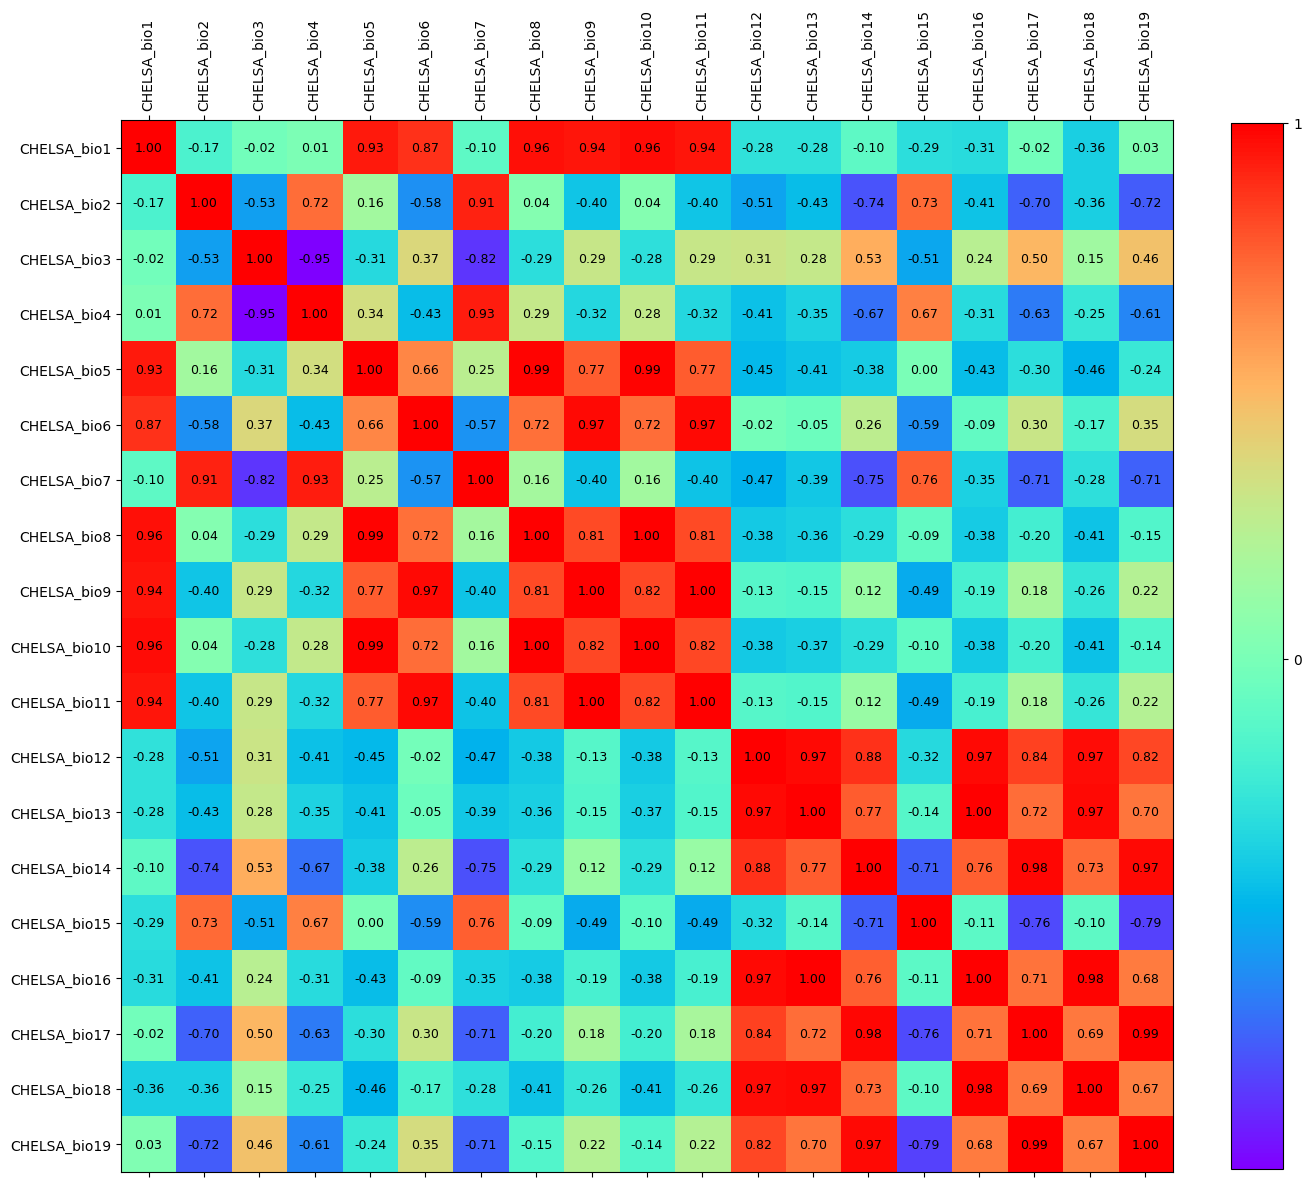

In [17]:
fig = plt.figure(figsize=(15,15))
img = plt.matshow(cov_data, cmap=plt.cm.rainbow, fignum=1)
plt.colorbar(img, ticks = [-1, 0, 1], fraction=0.045)
for x in range(cov_data.shape[0]):
    for y in range(cov_data.shape[1]):
        plt.text(x, y, "%0.2f" % cov_data[x,y], size=9, color='black', ha="center", va="center")

        
plt.xticks(ticks=range(0,len(allfeatures)),labels=allfeatures, rotation=90)
plt.yticks(ticks=range(0,len(allfeatures)),labels=allfeatures)
plt.show()

fig.savefig(f"./svg/3-correlogram.svg")

### Get high correlated variables

In [18]:
#get high correlated variables
threshold = 0.8
high_corr_var=np.where(abs(cov_data) > threshold)
high_corr_var=[(allfeatures[x],allfeatures[y]) for x,y in zip(*high_corr_var) if x!=y and x<y]
high_corr_var

[('CHELSA_bio1', 'CHELSA_bio5'),
 ('CHELSA_bio1', 'CHELSA_bio6'),
 ('CHELSA_bio1', 'CHELSA_bio8'),
 ('CHELSA_bio1', 'CHELSA_bio9'),
 ('CHELSA_bio1', 'CHELSA_bio10'),
 ('CHELSA_bio1', 'CHELSA_bio11'),
 ('CHELSA_bio2', 'CHELSA_bio7'),
 ('CHELSA_bio3', 'CHELSA_bio4'),
 ('CHELSA_bio3', 'CHELSA_bio7'),
 ('CHELSA_bio4', 'CHELSA_bio7'),
 ('CHELSA_bio5', 'CHELSA_bio8'),
 ('CHELSA_bio5', 'CHELSA_bio10'),
 ('CHELSA_bio6', 'CHELSA_bio9'),
 ('CHELSA_bio6', 'CHELSA_bio11'),
 ('CHELSA_bio8', 'CHELSA_bio9'),
 ('CHELSA_bio8', 'CHELSA_bio10'),
 ('CHELSA_bio8', 'CHELSA_bio11'),
 ('CHELSA_bio9', 'CHELSA_bio10'),
 ('CHELSA_bio9', 'CHELSA_bio11'),
 ('CHELSA_bio10', 'CHELSA_bio11'),
 ('CHELSA_bio12', 'CHELSA_bio13'),
 ('CHELSA_bio12', 'CHELSA_bio14'),
 ('CHELSA_bio12', 'CHELSA_bio16'),
 ('CHELSA_bio12', 'CHELSA_bio17'),
 ('CHELSA_bio12', 'CHELSA_bio18'),
 ('CHELSA_bio12', 'CHELSA_bio19'),
 ('CHELSA_bio13', 'CHELSA_bio16'),
 ('CHELSA_bio13', 'CHELSA_bio18'),
 ('CHELSA_bio14', 'CHELSA_bio17'),
 ('CHELSA_bio14

## Define main PCA functions

In [19]:
from sklearn.preprocessing import StandardScaler

def do_pca(df, features, components=3, names="species"):


    # Separating out the features
    x = df.loc[:, features].values
    # Separating out the target
    y = df.loc[:,[names]].values
    # Standardizing the features
    x = StandardScaler().fit_transform(x)
    
    # scaled_data = pd.DataFrame(data = x, 
    #                        columns = features,
    #                        index=df["new_name"].values)
    # # scaled_data.to_csv("scaled_data.csv")
    
    from sklearn.decomposition import PCA
    pca = PCA(n_components=components)
    principalStandComponents = pca.fit_transform(x)
    principalStandDf = pd.DataFrame(data = principalStandComponents, 
                               columns = [f"env-pc{c}" for c in range(1, components+1)],
                               index=df[names].values)
    
    return pca, principalStandDf

In [20]:
import seaborn as sns

def plot_pca(pca, principalDf, title="", alpha=1.0, put_names=False, legend=True, classification_column="sample_name"):
    
    
    principalDf = principalDf.dropna(axis='rows')
    
    categories = principalDf.loc[:, classification_column].values
    max_colors = len(np.unique(categories))
    

    
    
    #plot each category as independent set (put colors automatically)
    for i, n in enumerate(np.unique(categories)):
        subset = principalDf[categories == n] #create a mask based on the categories to subset the nmds fit results

        xp = subset.iloc[:,0]
        yp = subset.iloc[:,1]
        plt.scatter(xp,yp, label=n,
                    color=sns.color_palette("husl", max_colors)[i],
                    alpha=alpha)

        names = principalDf.index[categories == n]
        for i, label in enumerate(names):
            if put_names:
                plt.annotate(label, (xp[i], yp[i]))



    #add loadings       
    coeff = np.transpose(pca.components_[0:4, :])
    n = coeff.shape[0]

    for i in range(n):
        loading_x = coeff[i,0] * 20
        loading_y = coeff[i,1] * 20
        loading_name = df.loc[:, features].columns[i]
        plt.plot([0, loading_x],[0, loading_y], c="black", alpha=0.2, zorder=-1)
        plt.text(loading_x,loading_y, loading_name, color="black", alpha=0.2, zorder=-1)

    
    
                
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[0]:.2%})')
    if legend: 
        plt.legend(fontsize="small", loc="upper left")
    
        
    plt.title(title)
    
    plt.show()

## PCA including all variables

In [190]:
name = "3-pca-env_onlySpecimensinTree"

In [191]:
features = [f"CHELSA_bio{i}" for i in range(1,20)]

pca, principalDF = do_pca(df, features, components=4, names="assembly_name")

In [192]:
print(pca.explained_variance_ratio_)

[0.45211394 0.36162184 0.12018777 0.04139766]


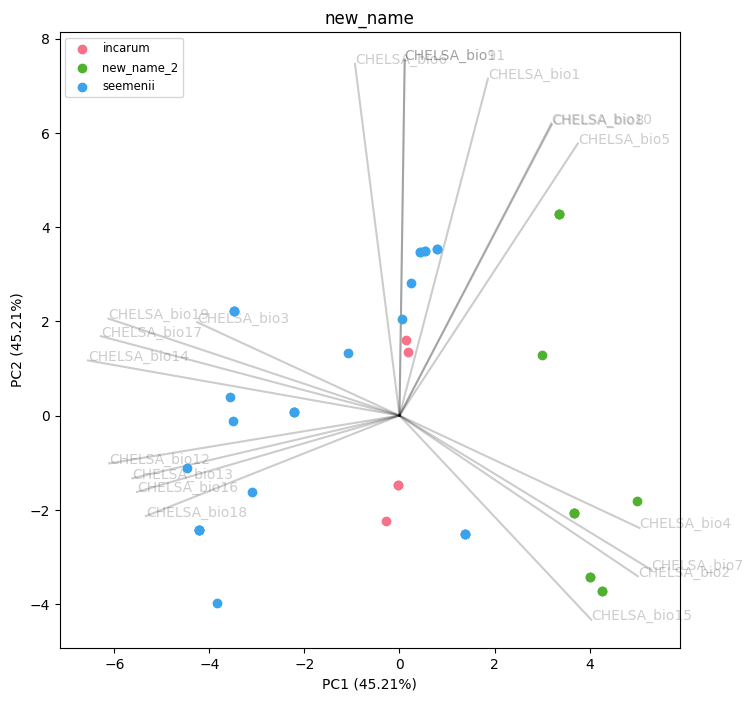

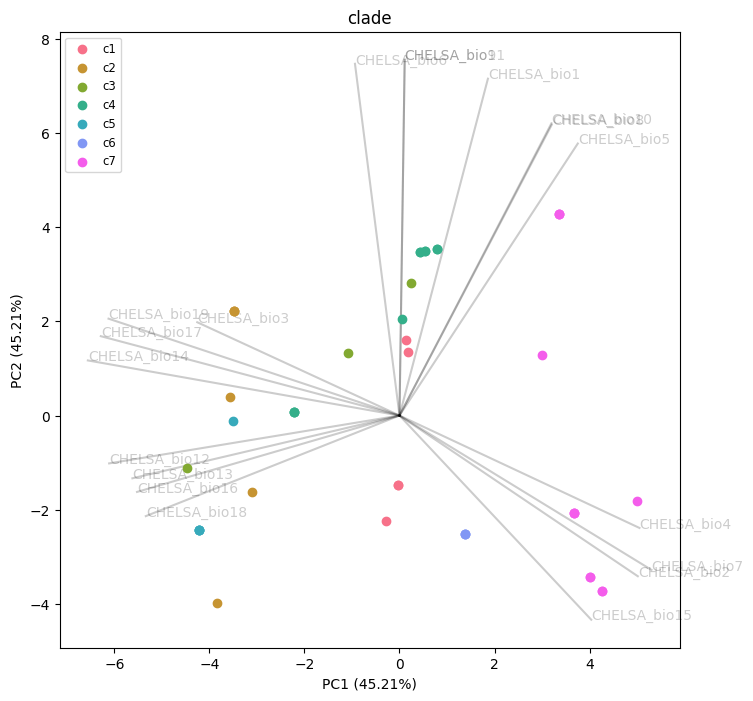

In [193]:
#do a pca for each classification



for classification in ['new_name', 'clade']:
    fig = plt.figure(figsize=(8, 8))
    # add samples names to the table
    principalDF["sample_name"] = df[classification].values
    c = plot_pca(pca, principalDF, title=classification)
    fig.savefig(f"./svg/{name}_{classification}.png")

In [194]:
#merge pc table with original table to produce a new table

In [195]:
principalDF['sample_name'] = principalDF.index

In [196]:
merged = pd.merge(df, principalDF, left_on="assembly_name", right_on="sample_name")
merged.drop(columns=["sample_name"], inplace=True)
merged.drop(columns=[f"CHELSA_bio{i}" for i in range(1,20)], inplace=True)
merged = merged.set_index("assembly_name")

In [197]:
merged.to_csv("../PGLS/envPCs_and_morpho_matching_with_tree.csv", index_label="assembly_name")

## PCA removing high correlated variables

In [107]:
name = "3-pca-env_noHighcorr_onlySpecimensinTree"

In [108]:
#removing all high correlated
features = ['CHELSA_bio1', 
               'CHELSA_bio2', 
               'CHELSA_bio3',
               # 'CHELSA_bio4', #removed for high corr. with lat
               'CHELSA_bio5',
               'CHELSA_bio6', 
               # 'CHELSA_bio7', #removed for high corr. with lat 
               # 'CHELSA_bio8', 
               'CHELSA_bio9', 
               'CHELSA_bio10',
               # 'CHELSA_bio11', 
               'CHELSA_bio12', 
               'CHELSA_bio13', 
               'CHELSA_bio14', 
               # 'CHELSA_bio15', #removed for high corr. with lat
               # 'CHELSA_bio16', 
               # 'CHELSA_bio17', 
               'CHELSA_bio18', 
               # 'CHELSA_bio19',
              ]

pca, principalDF = do_pca(df, features, components=4, names="assembly_name")

In [109]:
print(pca.explained_variance_ratio_)

[0.48183083 0.35148575 0.11526474 0.03687247]


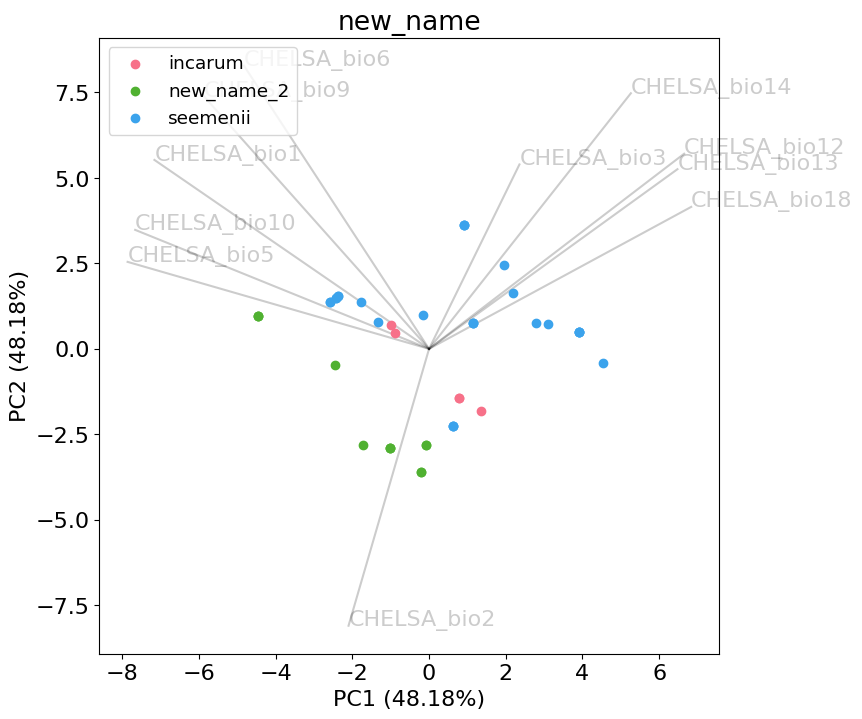

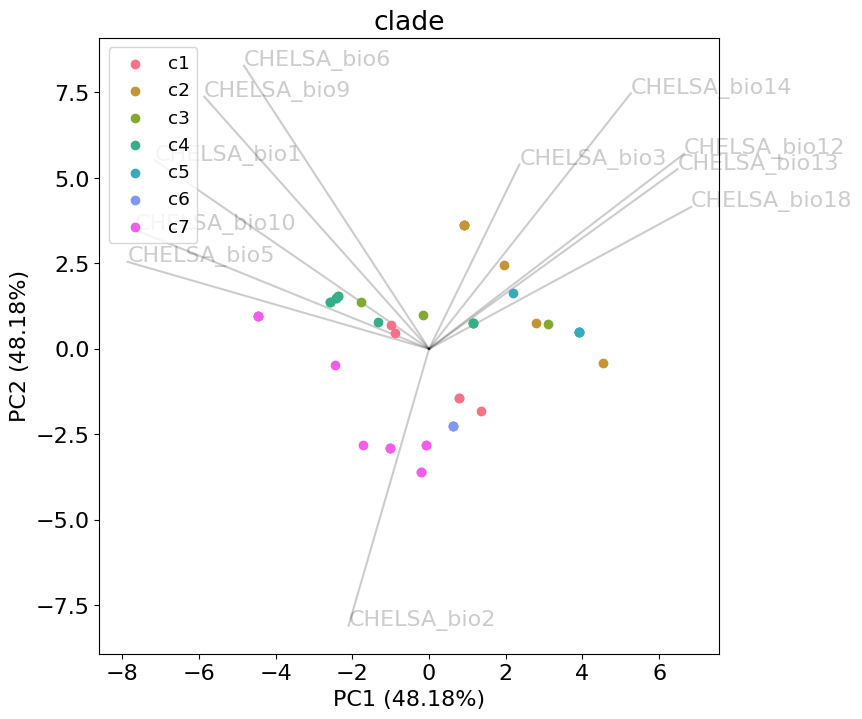

In [110]:
#do a pca for each classification



for classification in ['new_name', 'clade']:
    fig = plt.figure(figsize=(8, 8))
    # add samples names to the table
    principalDF["sample_name"] = df[classification].values
    c = plot_pca(pca, principalDF, title=classification)
    fig.savefig(f"./svg/{name}_{classification}.png")

In [185]:
#merge pc table with original table to produce a new table

In [111]:
principalDF['sample_name'] = principalDF.index

In [112]:
merged = pd.merge(df, principalDF, left_on="assembly_name", right_on="sample_name")
merged.drop(columns=["sample_name"], inplace=True)
merged.drop(columns=[f"CHELSA_bio{i}" for i in range(1,20)], inplace=True)
merged = merged.set_index("assembly_name")

In [113]:
merged.to_csv("../PGLS/envPCsNohighCorrelated_and_morpho_matching_with_tree.csv", index_label="assembly_name")

## PCA removing high correlated variables but redefine to plot with colors only for classification 2

In [114]:
#load tree to get tips
import toytree
tips = toytree.tree("/home/cm2828/project/viburnumThings/bolivia/notebooks/phylogeny/analysis-raxml/RAxML_bipartitions.10-bolivia-initial_mcov0.25_rcov0.1_ALLscaff_SelectiveSampling_RENAMED").get_tip_labels()

In [128]:
import seaborn as sns


def plot_pca_paperColors(pca, principalDf, title="", alpha=1.0, put_names=False, legend=True, classification_column="category", names_column="specimen"):
    
    
    principalDf = principalDf.dropna(axis='rows')
    
    categories = principalDf.loc[:, classification_column].values
    max_colors = len(np.unique(categories))
    
    
    markers_colors_dict = {
        "c6" : "#FFD92E",
        "c4" : "#E789C3",
        "c3" : "#8D9FCA",
        "c5" : "#A6D753",
        "c2" : "#FB8D61",
        "c1" : "#66C2A4",
        "c7" : "#E4C493",
        " ": "gray"
    }
    
    
    
    
    #add loadings       
    coeff = np.transpose(pca.components_[0:4, :])
    n = coeff.shape[0]

    for i in range(n):
        loading_x = coeff[i,0] * 8
        loading_y = coeff[i,1] * 8
        loading_name = df.loc[:, features].columns[i]
        loading_name = "Chelsa_" + loading_name.split("_")[1]
        plt.plot([0, loading_x],[0, loading_y], c="black", alpha=0.2, zorder=-1)
        plt.text(loading_x,loading_y, loading_name, color="black", alpha=0.7, zorder=-1, fontsize=12, horizontalalignment="center")

        
        
        
    
    #plot each category as independent set (put colors automatically)
    for i, n in enumerate(np.unique(categories)):
        subset = principalDf[categories == n] #create a mask based on the categories to subset the nmds fit results

        names_in_phylogeny = principalDf[names_column][categories == n]
        markers = ["o" if name in tips else "o" for name in names_in_phylogeny]
        markers_borders = ["black" if name in tips else None for name in names_in_phylogeny]
        
        # xp = subset.iloc[:,0]
        # yp = subset.iloc[:,1]
        
        
        for xp, yp, m, mb in zip(subset.iloc[:,0], subset.iloc[:,1], markers, markers_borders):
            plt.scatter(xp, 
                        yp, 
                        marker=m, 
                        color=markers_colors_dict[n],
                        alpha=alpha,
                        s=100,
                        edgecolors=mb, 
                       )
        
        
#         plt.scatter(xp,yp, label=n,
#                     s=35,
#                     # color=sns.color_palette("husl", max_colors)[i],
#                     color=markers_colors_dict[n],
#                     marker = markers,
#                     alpha=alpha)

        # names = principalDf.index[categories == n]
        # for i, label in enumerate(names):
        #     if put_names:
        #         plt.annotate(label, (xp[i], yp[i]))
                
        # names = principalDf[names_column][categories == n]
        # for i, label in enumerate(names):
        #     if label in tips:
        #         plt.annotate("*", (xp[i], yp[i]))


    
    
    
                
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
    # if legend: 
    #     plt.legend(fontsize="small")
    
        
    # plt.title(title)
    plt.rc('font', size=16)
    
    plt.show()

In [129]:
name = "3-pca-env_noHighcorr_onlySpecimensinTree_paperColors"

In [130]:
#removing all high correlated
features = ['CHELSA_bio1', 
               'CHELSA_bio2', 
               'CHELSA_bio3',
               # 'CHELSA_bio4', #removed for high corr. with lat
               'CHELSA_bio5',
               'CHELSA_bio6', 
               # 'CHELSA_bio7', #removed for high corr. with lat 
               # 'CHELSA_bio8', 
               'CHELSA_bio9', 
               'CHELSA_bio10',
               # 'CHELSA_bio11', 
               'CHELSA_bio12', 
               'CHELSA_bio13', 
               'CHELSA_bio14', 
               # 'CHELSA_bio15', #removed for high corr. with lat
               # 'CHELSA_bio16', 
               # 'CHELSA_bio17', 
               'CHELSA_bio18', 
               # 'CHELSA_bio19',
              ]
pca, principalDF = do_pca(df, features, components=4, names="assembly_name")

In [131]:
print(pca.explained_variance_ratio_)

[0.48183083 0.35148575 0.11526474 0.03687247]


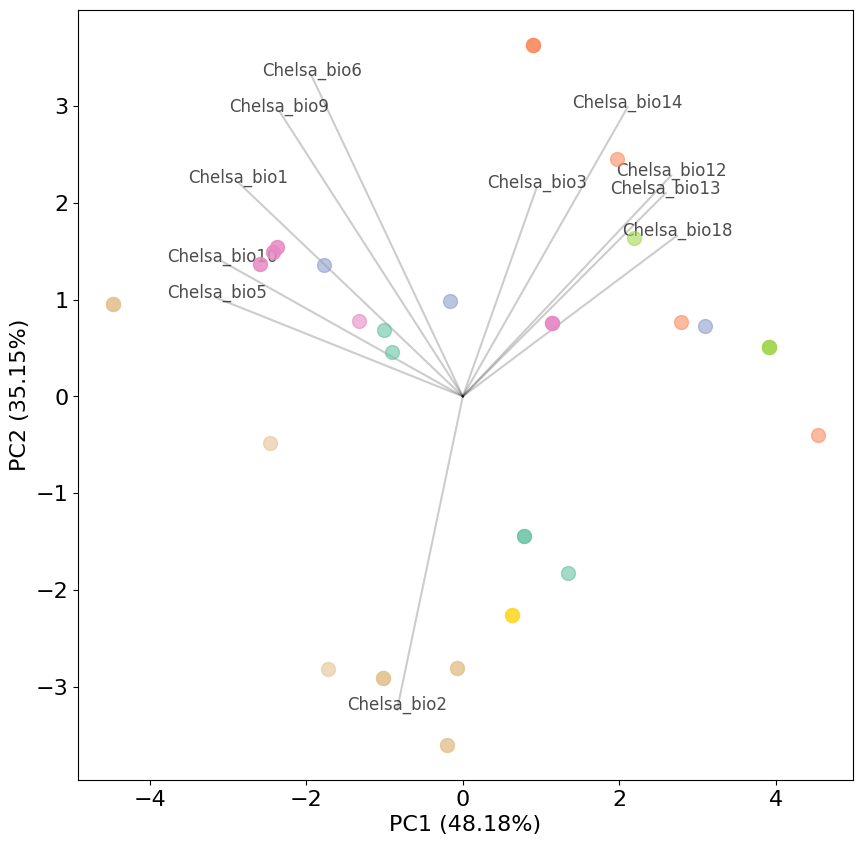

In [132]:
#do a pca for the classificationincluded in the paper

for classification in ['clade']:
    fig = plt.figure(figsize=(10, 10))
    # add categories names to the table
    principalDF["category"] = df[classification].values
    
    # add specimens names
    principalDF["sample_name"] = df[classification].values

   
    c = plot_pca_paperColors(pca, principalDF, title=classification, alpha=0.6, names_column="sample_name")
    fig.savefig(f"./svg/{name}_{classification}_altcols.png")
    fig.savefig(f"./svg/{name}_{classification}_altcols.svg")